# Practical 2: Recognising and plotting probability distributions

Exploring student attainment in schools

This week is focussed on using some common functions in Python to plot
data and distributions.

# Learning Outcomes

-   Familiarise yourself with opening datasets and formatting them in
    Python.
-   Practise plotting histograms of data in Python.
-   Explore different data distributions.

# Starting the Practical

As per last week: download the notebook to your `QM` folder, switch over
to `JupyterLab` (which will be running in Podman/Docker) and get to
work.

*Optionally* if you want to save the completed notebook to your Github
repo, you can `add`, `commit`, and `push` the notebook in Git after you
download it. When you’re done for the day, save your changes to the file
(This is very important!), then `add`, `commit`, and `push` your work to
save the completed notebook.

# Loading the data

We are going to look at schools performance data in England.

The data is sourced from gov.uk
[here](https://www.compare-school-performance.service.gov.uk/download-data) -
HOWEVER I have also saved a copy of the relevant dataset to the Github
repo (in case the dataset is removed from the website) which you can
load directly in the code below. In this notebook we’re using the
performance table for academic year 2022/23:
‘Performancetables_130242/2022-2023’.

If you do want to download the data directly from the gov.uk website
then you need to choose the academic year ‘2022 to 2023’, then ‘All of
England’, then ‘Key stage 4 results (final)’. Then you’ll want to
download the ‘Data in CSV format’ and also ‘Explanation of terminology
used in the data files’.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

# Read CSV file, handling common missing value entries
na_vals = ["", "NA", "SUPP", "NP", "NE", "SP", "SN", "SUPPMAT"]
df_ks4 = pd.read_csv('https://raw.githubusercontent.com/huanfachen/QM/refs/heads/main/sessions/L2_data/england_ks4final.csv',
    na_values = na_vals
)

info_cols = ['RECTYPE', 'LEA', 'SCHNAME', 'TOTPUPS']
ebaccs_cols = ['EBACCAPS', 'EBACCAPS_LO', 'EBACCAPS_MID', 'EBACCAPS_HI']

df = df_ks4[info_cols + ebaccs_cols]

# work on a copy of the dataframe to avoid SettingWithCopyWarning
df = df.copy()

df.head()

C:\Users\Adam\AppData\Local\Temp\ipykernel_16920\1412533053.py:7: DtypeWarning: Columns (75,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,144,145,146,147,148,149,150,151,152,177,178,179,180,181,182,183,186,187,188,189,190,191,192,194,195,196,198,199,200,202,203,204,206,207,208,210,211,212,214,215,216,218,219,220,222,223,224,230,233,234,235,236,237,238,239,242,243,244,245,246,247,248,251,252,253,254,255,256,257,266,267,268,269,270,271,272,281,282,283,284,285,286,287,296,297,298,299,300,301,302,311,312,313,314,315,316,317,335,336,337,340,341,342,345,346,347,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ks4 = pd.read_csv('https://raw.githubusercontent.com/huanfachen/QM/refs/heads/main/sessions/L2_data/england_ks4final.csv',

You might be wondering why I’ve chosen the columns `info_cols` and
`ebaccs_cols`. In open source datasets the column headers might be
obscure, or difficult to decipher - but typically metadata will be
provided that explains the meaning.

Looking at the metadata (which you can see in ‘L2_data/ks4_meta.xlsx’)
we can see the full meaning of each column header:

| Variable name | Meaning |
|------------|------------------------------------------------------------|
| RECTYPE | Record type (1=mainstream school; 2=special school; 4=local authority; 5=National (all schools); 7=National (maintained schools)) |
| LEA | Local authority |
| SCHNAME | School name |
| TOTPUPS | Number of pupils on roll (all ages) |
| EBACCAPS | Average EBacc APS score per pupil |
| EBACCAPS_LO | Average EBacc APS score per pupil with low prior attainment |
| EBACCAPS_MID | Average EBacc APS score per pupil with middle prior attainment |
| EBACCAPS_HI | Average EBacc APS score per pupil with high prior attainment |

EBacc stands for English Baccalaureate. It is a measure of students
school grades calculated as an average score across a set number of
subjects. It is used by the government as a performance indicator of
English schools. You can read more about it
[here](https://en.wikipedia.org/wiki/English_Baccalaureate#:~:text=Added%20together%2C%20this%20gives%20a,for%20girls%202018%20was%204.33.).

The EBacc has a minimum score of 0, which indicates very poor
performance, and a maximum score of 9, which indicates very high
performance.

# Describing the dataframe

The `pandas` library has lots of useful built in functions for analysing
dataframes. Let’s start by seeing how much data we have.

In [2]:
rows, cols = df.shape
print(f"Rows: {rows}, Columns: {cols}")

Rows: 5813, Columns: 8

The function `.shape` returns the number of rows and columns.

## Checking the data type

Let’s check the data type of each of the columns - based on the metadata
I am expecting:

| Variable name | Meaning | dtype |
|-----------|------------------------------------------------------|-------|
| RECTYPE | Record type (1=mainstream school; 2=special school; 4=local authority; 5=National (all schools); 7=National (maintained schools)) | int |
| LEA | Local authority | int |
| SCHNAME | School name | string |
| TOTPUPS | Number of pupils on roll (all ages) | int |
| EBACCAPS | Average EBacc APS score per pupil | float |
| EBACCAPS_LO | Average EBacc APS score per pupil with low prior attainment | float |
| EBACCAPS_MID | Average EBacc APS score per pupil with middle prior attainment | float |
| EBACCAPS_HI | Average EBacc APS score per pupil with high prior attainment | float |

In [3]:
df.dtypes

RECTYPE           int64
LEA             float64
SCHNAME          object
TOTPUPS          object
EBACCAPS        float64
EBACCAPS_LO     float64
EBACCAPS_MID    float64
EBACCAPS_HI     float64
dtype: object

OK, so we can see that not all the data types are quite as expected.
Let’s reformat them to make it easier later.

In [4]:
df.loc[:, ebaccs_cols] = df.loc[:, ebaccs_cols].apply(pd.to_numeric, errors='coerce')
df['TOTPUPS'] = pd.to_numeric(df['TOTPUPS'], errors='coerce').fillna(0).astype('int64')

And we can check again:

In [5]:
df.dtypes

RECTYPE           int64
LEA             float64
SCHNAME          object
TOTPUPS           int64
EBACCAPS        float64
EBACCAPS_LO     float64
EBACCAPS_MID    float64
EBACCAPS_HI     float64
dtype: object

## Check how much data is missing

Let’s check how much data is missing for each column in the dataframe -
this will help us understand the completeness of the data.

In [6]:
# print how much data is missing for each column
df.isna().mean() * 100 

RECTYPE          0.000000
LEA              0.034406
SCHNAME          2.683640
TOTPUPS          0.000000
EBACCAPS        17.684500
EBACCAPS_LO     38.775159
EBACCAPS_MID    41.149148
EBACCAPS_HI     42.490969
dtype: float64

It seems suspicious that the school names are missing for some of the
entries - let’s check these.

In [7]:
# return rows where SCHNAME is missing
df[df['SCHNAME'].isna()]

156 rows × 8 columns

So, these are all record type 4, 5, or 7. Looking back at the metadata I
see that record types 4, 5 and 7 refer to aggregated data - i.e. they’re
not individual schools! Let’s limit the selection to only individual
schools, that is 1-mainstream schools and 2-special schools.

In [8]:
# only keep rows where RECTYPE is 1 or 2 
df = df[df['RECTYPE'].isin([1, 2])].copy()

Now we can check the data dimensions again.

In [9]:
rows, cols = df.shape
print(f"Rows: {rows}, Columns: {cols}")

Rows: 5657, Columns: 8

### Summary statistics

We can use the `describe` function in pandas to easily get the summary
statistics for a dataframe.

In [10]:
numerical_cols = ['TOTPUPS', 'EBACCAPS', 'EBACCAPS_LO', 'EBACCAPS_MID', 'EBACCAPS_HI']

df[numerical_cols].describe()

## Histograms

Let’s try plotting the Average EBacc APS score per pupil.

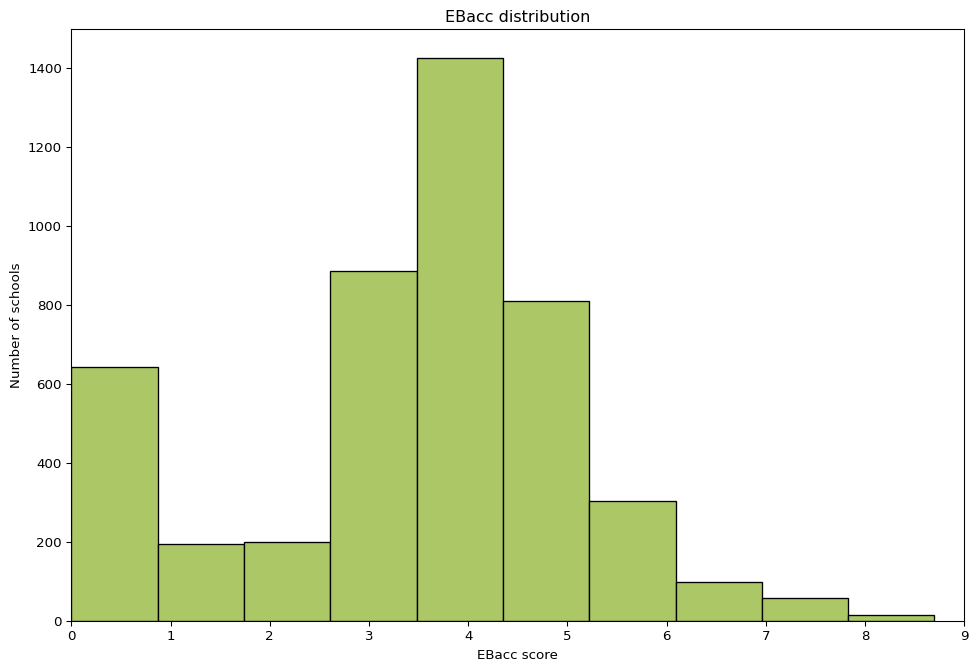

In [11]:
n_bins = 10
fig, ax = plt.subplots(figsize=(12, 8))

ax.hist(df['EBACCAPS'].dropna(), bins=n_bins, color='#abc766', edgecolor='black')
ax.set_title('EBacc distribution')
ax.set_xlabel('EBacc score')
ax.set_ylabel('Number of schools')  
ax.set_xlim(0,9) # the EBacc has a maximum score of 9

plt.show()

What do you observe from this boxplot? Because the bins are quite large
it’s difficult to get a sense of the distribution - try changing this to
get a better idea of the data spread.

#### Question

In [ ]:
n_bins = ??
fig, ax = plt.subplots(figsize=(12, 8))

ax.hist(df['EBACCAPS'].dropna(), bins=n_bins, color='#abc766', edgecolor='black')
ax.set_title('EBacc distribution')
ax.set_xlabel('EBacc score')
ax.set_ylabel('Number of schools')  
ax.set_xlim(0,9) # the EBacc has a maximum score of 9

plt.show()

### Is it normally distributed?

Looking at the histogram does the data look normally distributed?

Remember the key features of the normal distribution:

-   Data is continuous
    -   it is something you measure not something you count
-   Data is equally likely to be larger or smaller than average
    -   symmetric
-   Characteristic size, all data points are close to the mean
    -   single peak
-   There is less data further away from the mean
    -   smooth tails on both sides

One way to consider whether it is normally distributed is to overlay the
normal distribution on top.

We can use the package `scipy.stats` which has functions for generating
probability density functions for common distributions. You can see
which common distributions
[here](https://docs.scipy.org/doc/scipy/reference/stats.html).

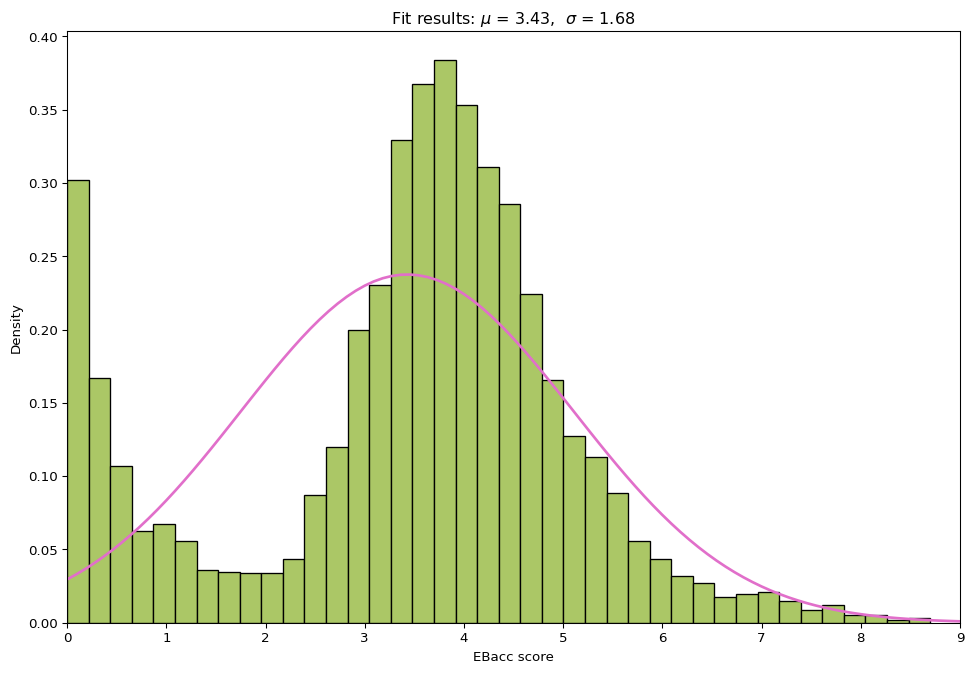

In [13]:
import scipy.stats as sps

# first let's get the mean and stand deviation 
mu = df['EBACCAPS'].dropna().mean()
std = df['EBACCAPS'].dropna().std()

## Create the plot 

# plot the histogram
plt.figure(figsize=(12, 8))
plt.hist(df['EBACCAPS'], bins=40, density=True, color='#abc766', edgecolor='black')

# plot the Probability Density Function (PDF)
xmin = 0 
xmax = 9
x = np.linspace(xmin, xmax, 100)
p = sps.norm.pdf(x, mu, std)
plt.plot(x, p, linewidth=2, color="#e16fca")

plt.title(f"Fit results: $\\mu$ = {mu:.2f},  $\\sigma$ = {std:.2f}")
plt.xlim(0, 9)
plt.xlabel("EBacc score")
plt.ylabel("Density")

plt.show()

Note that this time we plot the histogram with `density=True` - this
scales the histogram data.

Another way to think about whether something is normally distirbuted is
to look at the Q-Q plot.

### Q-Q plot

A Q-Q plot is used to see if a dataset follows a certain distribution,
by comparing the quartiles of the two. You can read a bit more about Q-Q
plots [here](https://www.datacamp.com/tutorial/qq-plot).

Q-Q plots are a good way to check if a dataset follows a normal
distribution.

#### Question

Thinking about the characteristics of a normal distribution, what would
you expect the Q-Q plot of a normally distributed dataset to look like?

The results of the Q-Q plot can help us to understand the dataset:

-   For perfectly normal data: *points fall almost exactly on the
    diagonal line*
-   Heavy tails (more extreme values than normal): *points curve away at
    the end*
-   Light tails (fewer extreme values than normal): *points bend inward
    at the ends*
-   Skewed data: *points systematically deviate above or below the line*

We can plot the Q-Q plot in Python. Note that before we Q-Q plot the
sample data we will need to normalise it - this accounts for the fact
that our data is not centred around 0.

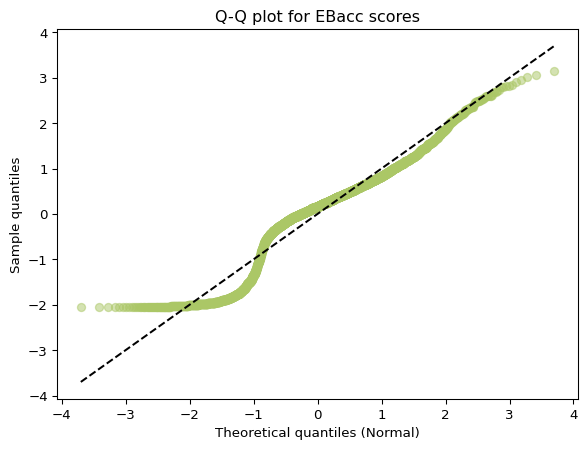

In [14]:
# Drop missing values
data = df['EBACCAPS'].dropna().values
n = len(data)

# normalise the data
data = (data - np.mean(data)) / np.std(data)

# Sort the sample data
sample_quantiles = np.sort(data)

# Compute plotting positions (probabilities)
p = (np.arange(1, n+1) - 0.5) / n

# Compute theoretical quantiles from standard normal
theoretical_quantiles = sps.norm.ppf(p)

# Plot
plt.scatter(theoretical_quantiles, sample_quantiles, alpha=0.5, color='#abc766')
plt.plot(theoretical_quantiles, theoretical_quantiles, color='black', linestyle='--')  # reference line
plt.title("Q-Q plot for EBacc scores")
plt.xlabel("Theoretical quantiles (Normal)")
plt.ylabel("Sample quantiles")

plt.show()

Ok, so in case it wasn’t clear from the previous plot we can see that
the data definitely isn’t perfectly normal.

## What’s causing the skew?

If you remember above this dataset includes schools of two different
types, we have mainstream schools and special schools. ‘special schools’
refers to schools which cater to students with special educational
needs. Let’s see what happens when we split our histogram according to
the type of school.

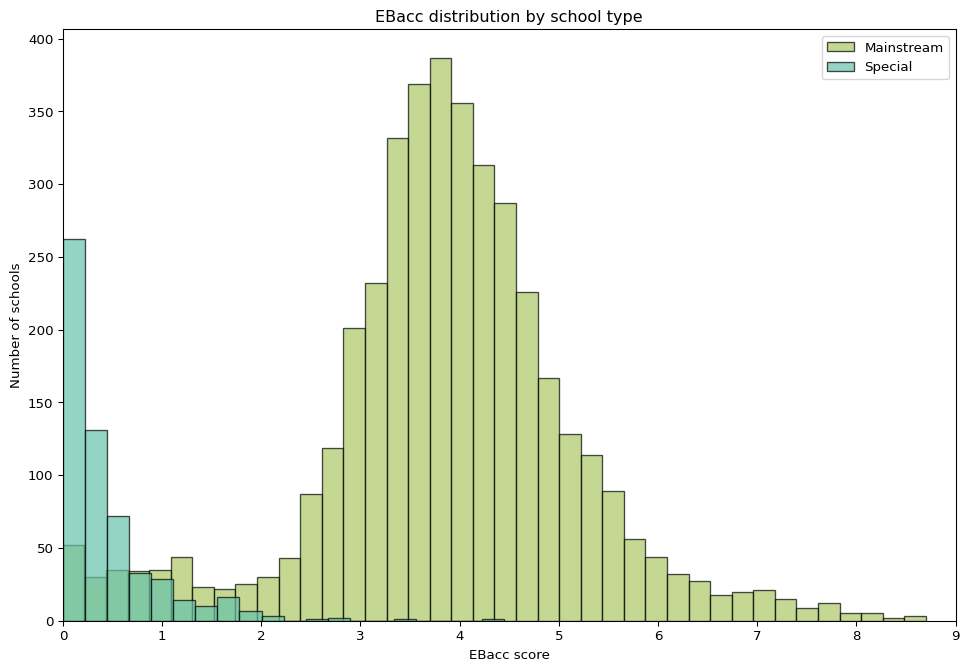

In [15]:
# histogram of # plot histogram of EBACCAPS by RECTYPE
n_bins = {1:40, 2:20}
fig, ax = plt.subplots(figsize=(12, 8))
for rectype, color, label in zip([1, 2], ['#abc766', '#66c2ab'], ['Mainstream', 'Special']):
    ax.hist(df_ks4.loc[df_ks4['RECTYPE'] == rectype, 'EBACCAPS'].dropna(), bins=n_bins[rectype], alpha=0.7, color=color, edgecolor='black', label=label)
ax.set_title('EBacc distribution by school type')
ax.set_xlabel('EBacc score')
ax.set_ylabel('Number of schools')  
ax.set_xlim(0,9)
ax.legend()

plt.show()

Note that I’ve played with the number of total bins for each group so
that the histograms look nice.

Looking now at the histogram it becomes clear that the skewness of the
data is caused by the different school types.

## Another check for normality

Let’s try again to see if the data is normal - this time splitting the
dataset according to the school type.

We can start by splitting the dataset according to the school type.

#### Question

In [ ]:
# mainstream school
df1 = df[??]

# special schools 
df2 = df[??]

### Q-Q plot for mainstream schools

#### Question

In [ ]:
# Drop missing values
data = df1['EBACCAPS'].dropna().values
n = len(data)

# normalise the data
data = (data - np.mean(data)) / np.std(data)

# Sort the sample data
sample_quantiles = ??

# Compute plotting positions (probabilities)
p = ??

# Compute theoretical quantiles from standard normal
theoretical_quantiles = ??

# Plot
plt.scatter(theoretical_quantiles, sample_quantiles, alpha=0.5, color='#abc766')
plt.plot(theoretical_quantiles, theoretical_quantiles, color='black', linestyle='--')  # reference line
plt.title("Mainstream schools: Q-Q plot for EBacc scores")
plt.xlabel("Theoretical quantiles (Normal)")
plt.ylabel("Sample quantiles")

plt.show()

## Q-Q plot for special schools

#### Question

In [ ]:
# Drop missing values
data = df2['EBACCAPS'].dropna().values
n = len(data)

# normalise the data
data = (data - np.mean(data)) / np.std(data)

# Sort the sample data
sample_quantiles = ??

# Compute plotting positions (probabilities)
p = ??

# Compute theoretical quantiles from standard normal
theoretical_quantiles = ??

# Plot
plt.scatter(theoretical_quantiles, sample_quantiles, alpha=0.5, color='#abc766')
plt.plot(theoretical_quantiles, theoretical_quantiles, color='black', linestyle='--')  # reference line
plt.title("Special schools: Q-Q plot for EBacc scores")
plt.xlabel("Theoretical quantiles (Normal)")
plt.ylabel("Sample quantiles")

plt.show()

Looking at the resultant Q-Q plots what can we say about the data? We
see that the mainstream schools is a skewed dataset, whilst the special
schools dataset has a heavy tail.

## Extension

### EBacc by prior attainment

If you’ve finished looking at the histogram plots of the EBacc data, try
plotting the histograms of the columns ‘EBACCAPS_LO’, ‘EBACCAPS_MID’,
‘EBACCAPS_HI’. What can you say about these data distributions? Does
plotting the Q-Q plots help?

#### Question

In [ ]:
n_bins = ??
fig, ax = plt.subplots(3, 1, figsize=(12, 18))
plot_names = ['EBacc low prior', 'EBacc mid prior', 'EBacc high prior']

for i, col in ??:
    ax[i].hist(df[col].dropna(), bins=n_bins, color='#abc766', edgecolor='black')
    ax[i].set_title(plot_names[i])
    ax[i].set_xlabel('EBacc score')
    ax[i].set_ylabel('Number of schools')  
    ax[i].set_xlim(0,9) # the EBacc has a maximum score of 9
    
plt.show()

### EBacc by school size

If you’ve finished everything else, then you might like to look at some
of the other variables in the dataset. Try plotting the EBacc scores
against the total number of pupils (‘TOTPUPS’) - for example using a
scatter plot - what can you say about this distribution?

## You’re Done!

Congratulations on completing the second QM practical session! If you
are still working on it, take your time.

Don’t worry about understanding every detail of the Python code — what
matters most is knowing which functions to use for a specific task, like
plotting histograms of data, and knowing how to debug when it goes
wrong. Remember, practice makes perfect.